## **정규화 (Normalization)**

**왜 정규화를 해야 하는가?**

* 머신러닝 알고리즘은 데이터가 가진 feature(특성)들을 비교하여 데이터의 패턴을 찾음. 여기서 주의해야 할 점은 데이터가 가진 feature의 스케일이 심하게 차이가 나는 경우 문제가 발생.
* 예를 들어 ‘주택’에 관한 정보가 담긴 데이터에서 feature로 방의 개수(10개 미만 차이), 얼마나 오래 전에 지어졌는지(길게는 몇 백년) 같은 것들이 포함될 수 있음
* 머신러닝 알고리즘을 통해 어느 집이 가장 적합한지 예측을 시도한다고 할 때, 각 데이터 포인트를 비교할 때 더 큰 스케일을 가진 feature, 즉 얼마나 오래 전에 지어졌는지(년)에 따라 그 데이터가 완전히 좌지우지 될 수 있음.


* 정규화는 기본이기 때문에 중요. 정규화를 간과하면 학습 성능에 치명적인 영향을 끼칠 수도 있음. 정규화는 머신러닝 알고리즘을 훈련시키는데 있어서 사용되는 특성(feature)들이 모두 비슷한 영향력을 행사하도록 값을 변환해주는 기술

* 부동산 가격과 연관이 있을 것과 같은 특성들을 도출(extract). 
    * 집의 평수 : 10평부터 100평까지
    * 아파트 건축 후 경과 기간 : 1년에서 20년
    * 지하철 역과의 거리 : 0.1km부터 수km
    * 대형마트와의 거리 : 수 km에서 수십km

* '평수', '년', 'km' 등 각 특성의 단위도 다르고, 값의 범위도 꽤 차이가 있다는 것


* 기본적으로 단위가 다르면 직접적인 비교가 불가능

* 예를 들어 사람의 키와 사람의 몸무게를 직접적으로 비교할 수 없음
    * 키가 170cm인 사람은 몸무게가 75kg사람보다 비만이지 않다???

* 동일한 단위를 사용 하더라도 값의 범위가 크게 차이나는 상황에서는 비교가 어려움
    * 100점 만점에서 90점을 맞는 것과 1000점 만점에서 90점

* 특성들의 단위에 의한 차이를 무시할 수 있도록, 또한 특성들의 값의 범위를 비슷하게 만들어줄 필요가 있음
* 이것이 정규화가 하는 일 - 특성 스케일링(feature scaling) 또는 데이터 스케일링(data scaling)


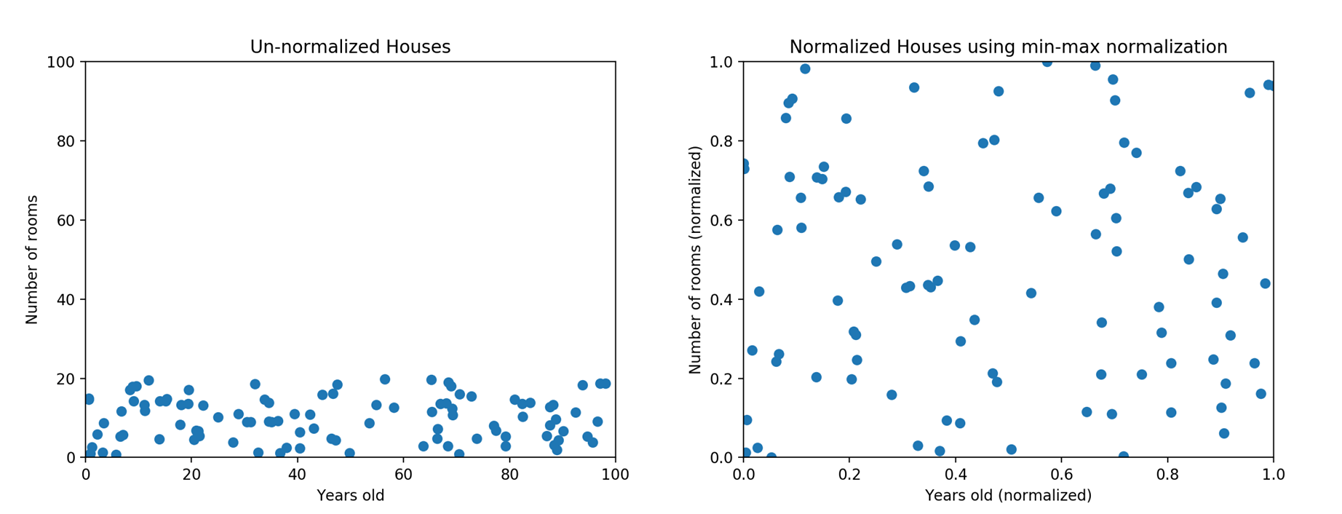

* 위 그림에서도 알 수 있듯이 만약 두 집이 비슷한 시기에 지어졌을 경우 두 데이터 포인트가 매우 가깝게 위치하게 됨. 방 개수는 별로 중요한 요소가 아니게 됨
* 따라서 **모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게** 정규화(Normalization)의 목표.


### **Min-Max Normalization (최소-최대 정규화)**
* 가장 일반적인 방법. 모든 feature에 대해 각각의 최소값 0, 최대값 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환.
    * 예를 들어 어떤 특성의 최소값이 20이고 최대값이 40인 경우, 30은 딱 중간이므로 0.5로 변환 됨.

* X라는 값에 대해 최소-최대 정규화를 한다면 아래와 같은 수식을 사용
    
    `(X - X.min()) / (X.max() - X.min)`
```python
    def min_max_normalize(lst):
        normalized = []
        for value in lst:
            normalized_num = (value - min(lst)) / (max(lst) - min(lst))
            normalized.append(normalized_num)    
        return normalized
```
이 공식을 통해 특성 내에 가장 큰 값은 1로, 가장 작은 값은 0으로 변환

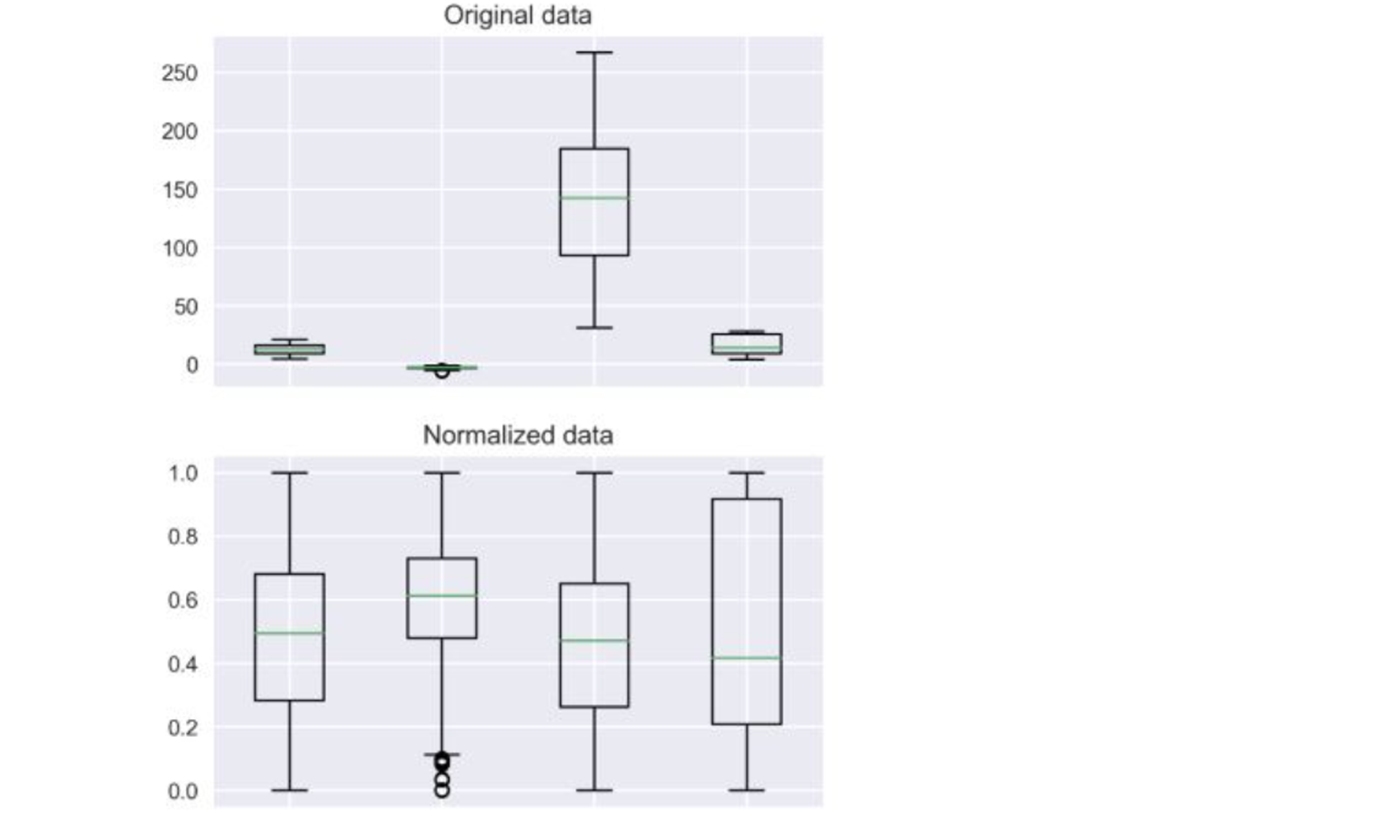

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.random.randint(100, 1000, (10, 5))
data


array([[102, 237, 467, 187, 838],
       [263, 622, 537, 483, 335],
       [452, 959, 724, 385, 580],
       [211, 978, 444, 166, 711],
       [526, 471, 772, 210, 163],
       [726, 163, 308, 240, 914],
       [450, 925, 718, 551, 804],
       [689, 648, 963, 479, 232],
       [887, 623, 239, 753, 565],
       [732, 323, 197, 268, 400]], dtype=int32)

In [13]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [14]:
minmax_scaler.transform(data) # 0~1 사이로 재분배

array([[0.        , 0.09079755, 0.35248042, 0.03577513, 0.8988016 ],
       [0.20509554, 0.56319018, 0.44386423, 0.54003407, 0.22902796],
       [0.44585987, 0.97668712, 0.68798956, 0.37308348, 0.55525965],
       [0.1388535 , 1.        , 0.32245431, 0.        , 0.72969374],
       [0.54012739, 0.37791411, 0.75065274, 0.07495741, 0.        ],
       [0.79490446, 0.        , 0.14490862, 0.12606474, 1.        ],
       [0.4433121 , 0.93496933, 0.68015666, 0.65587734, 0.85352863],
       [0.7477707 , 0.59509202, 1.        , 0.53321976, 0.0918775 ],
       [1.        , 0.56441718, 0.05483029, 1.        , 0.53528628],
       [0.80254777, 0.19631902, 0.        , 0.17376491, 0.31557923]])

#### **딥러닝에서의 정규화의 목적**

스케일링을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 **오버플로우(overflow)나 언더플로우(underflow)를 방지** 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 **최적화 과정에서의 안정성 및 수렴 속도를 향상** 시킴.


####  **이상치(outlier에 대한 고민)**

* 예를 들어, 100개의 값이 있는데 그 중 99개는 0과 40 사이에 있고, 나머지 하나가 100이면 어떨까? 그러면 99개의 값이 모두 0부터 0.4 사이의 값으로 변환.
* 오렌지 색의 점으로 인해 나머지 값들이 특정 범위로 한정됨
* 다양한 통계적인 기법을 적용하면 개선되기는 하나 영향을 제거할 수는 없음
* 결론적으로 **모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 함.**


### Stardard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.random.randint(100, 1000, (10, 5))
standard_scaler = StandardScaler()
standard_scaler.fit(data)

,copy,True
,with_mean,True
,with_std,True


In [16]:
standard_scaler.mean_

array([637.1, 517.7, 647.8, 603.7, 550.4])

In [19]:
scaled_data = standard_scaler.transform(data)
scaled_data

array([[-0.89072836,  0.25629745,  1.04105491,  0.19108181, -1.01795679],
       [-0.64552486,  0.79826341,  0.61829149, -1.64107483,  0.16777735],
       [-0.80544019, -0.7716896 ,  0.91554702,  0.68271597, -1.09861898],
       [ 0.32462811,  0.28077333, -1.80268962, -1.01833823,  0.07904894],
       [ 1.76919655, -0.42553069,  0.00396341,  1.21695843,  0.51462475],
       [-0.65085538,  1.34022937, -0.7556896 , -1.06422408,  1.40594191],
       [-0.11247378, -1.42904186, -0.66651294,  1.03341501,  1.2728493 ],
       [ 0.62313672,  1.62345029,  0.81646184,  0.2926862 ,  1.03489585],
       [ 1.60928123, -1.36960043, -1.25772116,  1.14157453, -1.24381091],
       [-1.22122004, -0.30315128,  1.08729466, -0.83479481, -1.11475141]])

In [21]:
scaled_data.mean(axis=0).round(0)

array([-0., -0.,  0., -0.,  0.])

In [22]:
scaled_data.std(axis=0)

array([1., 1., 1., 1., 1.])